<a href="https://colab.research.google.com/github/marcoosnt1/Portifolio_Data_Science/blob/main/nlp_classificando_text_spam_ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1.Importando os dados** 

In [20]:
import pandas as pd
import nltk 
import seaborn as sns
import matplotlib as plt 
%matplotlib inline 

In [9]:
#lendo o arquivo
messages = [line.rstrip() for line in open('/content/SMSSpamCollection')]

In [10]:
print(len(messages))

5574


In [11]:
#mostrando a primeira mensagem da lista
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [13]:
#usando o for para pegar as primeiras 15 linhas do metodo messages
for mensagem_number,message in enumerate(messages[:15]):
    print(mensagem_number,message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code 

In [14]:
#convertendo para csv
df = pd.read_csv('/content/SMSSpamCollection',sep = '\t', names = ['label','messages'])

In [15]:
df.head()

,label,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df.isnull().sum()

label       0
messages    0
dtype: int64

## **2. Analise exploratória dos dados**

In [17]:
df.describe()

,label,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [18]:
df.groupby('label').describe()

messages                                                               
         count unique                                                top freq
label                                                                        
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4

In [ ]:
#verificando quantos caracteres existem em cada mensagem

In [21]:
df['tamanho'] = df['messages'].apply(len)

In [22]:
df.head()

,label,messages,tamanho
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


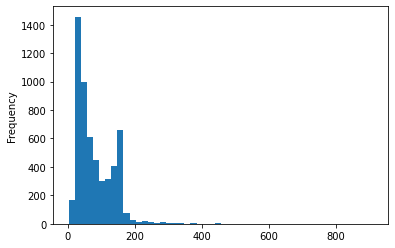

In [24]:
#plotando um histograma para verificar o tamanho das mensagens
df['tamanho'].plot(kind='hist',bins =50)

In [25]:
#verificando outliers
df['tamanho'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: tamanho, dtype: float64

In [28]:
#verificando a mensagem com maior tamanho
df[df['tamanho'] == 910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f816d9cb750>,
      dtype=object)

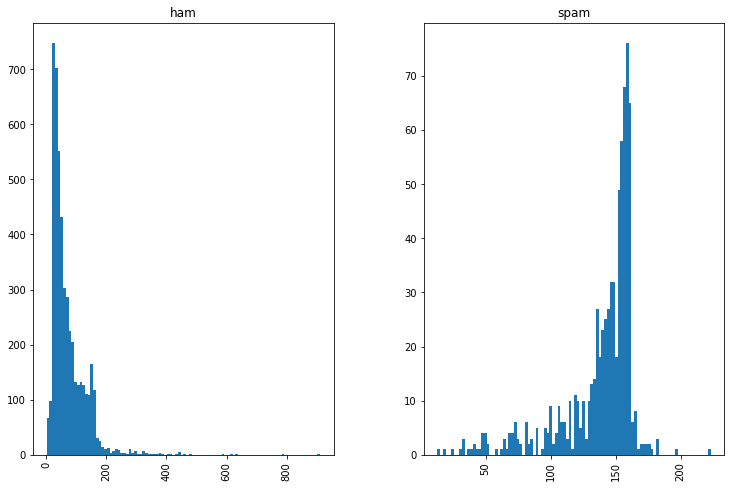

In [30]:
#criando um histograma segregando por label 
df.hist(bins=100,column='tamanho',by='label',figsize=(12,8))

## **3.Pré Processamento e treinando o modelo**

In [85]:
from nltk.corpus import stopwords
import string 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [42]:
# criando uma função para limpar as mensagens e devolver apenas stopwords sem pontuação
def text_process(mensagem):
    #retirando as pontuações
    nopunc = [char for char in mensagem if char  not in string.punctuation]
    #juntando para formatar as strings 
    nopunc = ''.join(nopunc)
    sms = [ word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return sms 

In [43]:
# transformando os sms em mensagem unicas 
vec = CountVectorizer(analyzer = text_process).fit(df['messages'])

In [45]:
print(len(vec.vocabulary_))

11425


**Criando um bag of words com mensagem 4 da lista**

In [50]:
menssagem_4 = df['messages'][3]
menssagem_4

'U dun say so early hor... U c already then say...'

In [54]:
bow_4 = vec.transform([menssagem_4])

In [56]:
print(bow_4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [60]:
print(vec.get_feature_names()[4629])

already


In [73]:
mensagem_bow = vec.transform(df['messages'])

In [74]:
print((mensagem_bow.shape))

(5572, 11425)


In [75]:
print(mensagem_bow.nnz)

50548


In [77]:
#calculando a sparticidade (valor de 0 no nnz)
sparsity =(100*mensagem_bow.nnz / (mensagem_bow.shape[0]*mensagem_bow.shape[1]))
print(sparsity)

0.07940295412668218


**Fazendo a contagem de palavras em todo o documento usando o TfidfTransformer**

In [80]:
tf_idf = TfidfTransformer()

In [82]:
tf_idf = tf_idf.fit(mensagem_bow)

In [84]:
tf_idf_4 = tf_idf.transform(bow_4)

**Treinando o modelo  usando um naive bayes para classificar Documento em Spam ou não**

In [87]:
mensagens_tfidf = tf_idf.transform(mensagem_bow)

In [86]:
#instanciando o objeto
spam_detect_model = MultinomialNB()

In [88]:
#treinando o modelo 
spam_detect_model.fit(mensagens_tfidf,df['label'])

MultinomialNB()

In [92]:
print('Predito:',spam_detect_model.predict(tf_idf_4)[0])
print('Esperado:',df['label'][3])

Predito: ham
Esperado: ham


**Dividindo o dataset entre treino e teste**

In [93]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(df['messages'],df['label'],test_size=0.2)

In [95]:
from sklearn.pipeline import Pipeline

In [96]:
#criando uma pipeline
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer=text_process)),
    ('tfidf',TfidfTransformer()),
    ('Classificador',MultinomialNB()),
])

In [97]:
pipeline.fit(msg_train,label_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7f816d343cb0>)),
                ('tfidf', TfidfTransformer()),
                ('Classificador', MultinomialNB())])

In [98]:
pred = pipeline.predict(msg_test)

In [99]:
from sklearn.metrics import classification_report

## **4.Verificando a accuracia do modelo**

In [100]:
print(classification_report(pred,label_test))

              precision    recall  f1-score   support

         ham       1.00      0.96      0.98      1015
        spam       0.69      1.00      0.82       100

    accuracy                           0.96      1115
   macro avg       0.85      0.98      0.90      1115
weighted avg       0.97      0.96      0.96      1115

